In [1]:
import pandas as pd

df = pd.read_csv("sales_data.csv")

print(df.head(15))

   Month  Sales  Expenses  Profit
0    Jan   1200       800     400
1    Feb   1300       850     450
2    Mar   1500       900     600
3    Apr   1400       950     450
4    May   1600      1000     600
5    Jun   1700      1050     650
6    Jul   1800      1100     700
7    Aug   1900      1200     700
8    Sep   2000      1300     700
9    Oct   2100      1350     750
10   Nov   2200      1400     800
11   Dec   2500      1500    1000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     12 non-null     object
 1   Sales     12 non-null     int64 
 2   Expenses  12 non-null     int64 
 3   Profit    12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [3]:
df.describe()

,Sales,Expenses,Profit
count,12.000000,12.000000,12.000000
mean,1766.666667,1116.666667,650.000000
std,391.578004,230.940108,167.874412
min,1200.000000,800.000000,400.000000
25%,1475.000000,937.500000,562.500000
50%,1750.000000,1075.000000,675.000000
75%,2025.000000,1312.500000,712.500000
max,2500.000000,1500.000000,1000.000000


In [4]:
df

,Month,Sales,Expenses,Profit
0,Jan,1200,800,400
1,Feb,1300,850,450
2,Mar,1500,900,600
3,Apr,1400,950,450
4,May,1600,1000,600
5,Jun,1700,1050,650
6,Jul,1800,1100,700
7,Aug,1900,1200,700
8,Sep,2000,1300,700
9,Oct,2100,1350,750


In [5]:
import numpy as np

sales = df['Sales'].to_numpy()
expenses = df['Expenses'].to_numpy()
profit = df['Profit'].to_numpy()

print("Average Sales:", np.mean(sales))
print("Total Profit:", np.sum(profit))
print("Standard Deviation of Profit:", np.std(profit))


Average Sales: 1766.6666666666667
Total Profit: 7800
Standard Deviation of Profit: 160.7275126832159


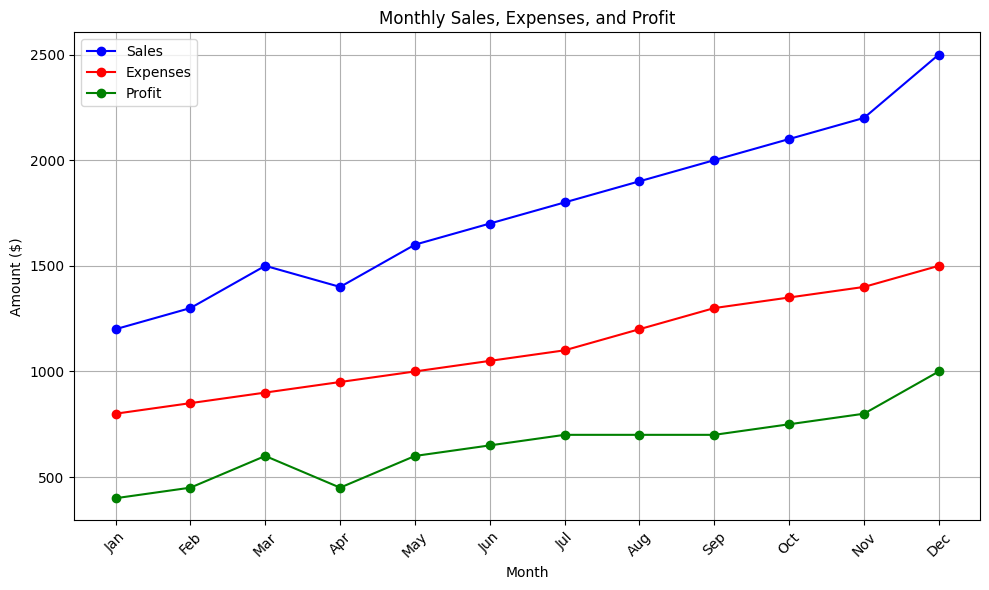

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['Month'], df['Sales'], marker='o', label='Sales', color='blue')
plt.plot(df['Month'], df['Expenses'], marker='o', label='Expenses', color='red')
plt.plot(df['Month'], df['Profit'], marker='o', label='Profit', color='green')

plt.title('Monthly Sales, Expenses, and Profit')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd 

df = pd.read_csv("ecommerce_orders.csv")

print(df.info())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         1000 non-null   object 
 1   CustomerID      1000 non-null   object 
 2   ProductID       1000 non-null   object 
 3   Category        1000 non-null   object 
 4   OrderDate       1000 non-null   object 
 5   Quantity        1000 non-null   int64  
 6   UnitPrice       1000 non-null   float64
 7   ShippingStatus  1000 non-null   object 
 8   TotalPrice      1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB
None
   OrderID CustomerID ProductID     Category   OrderDate  Quantity  UnitPrice  \
0  O100000     C00103     P0049  Electronics  2023-10-04         1      321.9   
1  O100001     C00271     P0045        Books  2023-06-14         1      321.9   
2  O100002     C00107     P0093         Home  2023-01-26         3      321.9   
3  O1000

In [8]:

df['OrderDate'] = pd.to_datetime(df['OrderDate'])


print(df.isnull().sum())


df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


OrderID           0
CustomerID        0
ProductID         0
Category          0
OrderDate         0
Quantity          0
UnitPrice         0
ShippingStatus    0
TotalPrice        0
dtype: int64


In [9]:
total_revenue = df['TotalPrice'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 795093.0


In [10]:
top_categories = df.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False)
print(top_categories.head(5))

Category
Home           172860.3
Toys           159340.5
Electronics    159018.6
Books          152902.5
Clothing       150971.1
Name: TotalPrice, dtype: float64


C:\Users\Senthil Kumar\AppData\Local\Temp\ipykernel_20112\2309404937.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='OrderDate')['TotalPrice'].sum()


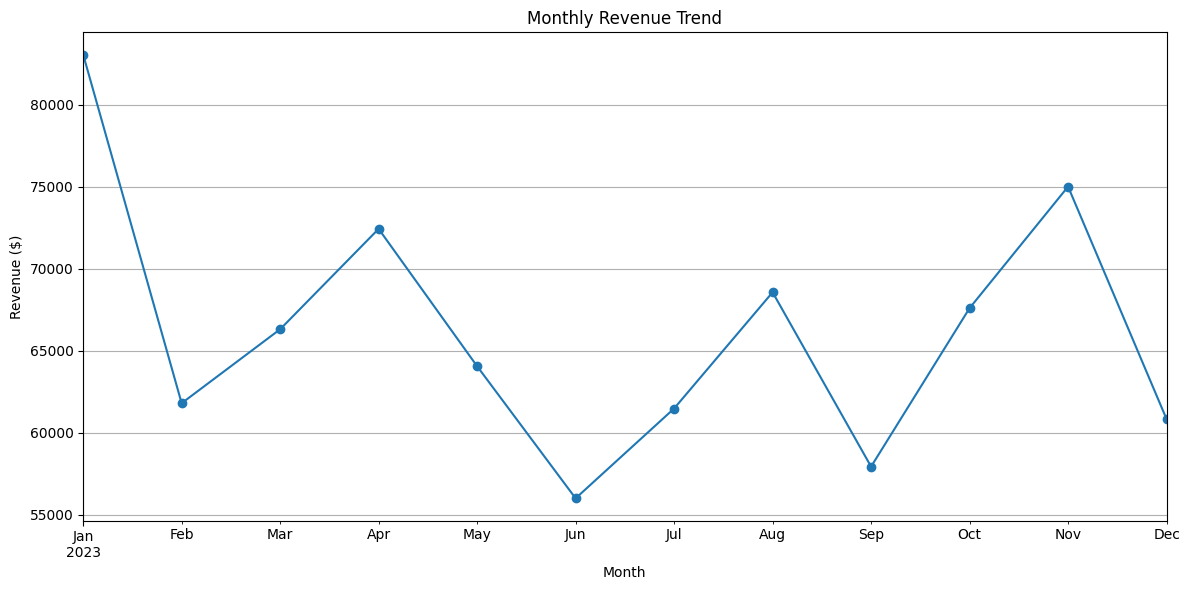

In [11]:
monthly_sales = df.resample('M', on='OrderDate')['TotalPrice'].sum()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
top_products = df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print(top_products.head(10))

ProductID
P0098    59
P0060    40
P0093    39
P0029    38
P0037    38
P0011    36
P0062    36
P0088    35
P0025    35
P0008    35
Name: Quantity, dtype: int64


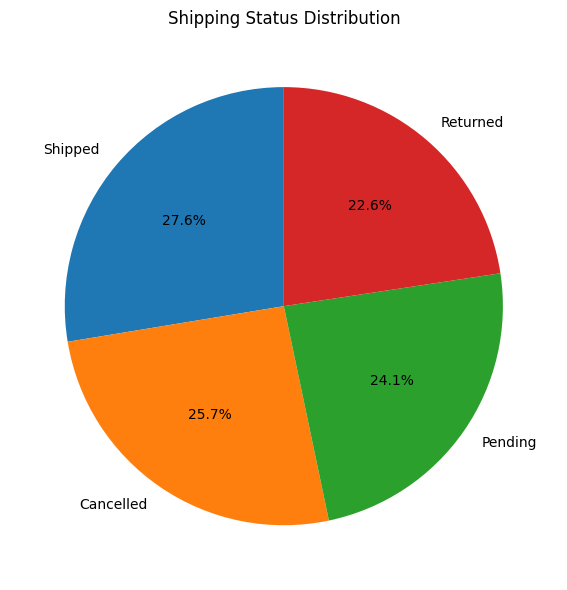

In [13]:
df['ShippingStatus'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title('Shipping Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [14]:
aov = df.groupby('OrderID')['TotalPrice'].sum().mean()
print("Average Order Value:", round(aov, 2))

Average Order Value: 795.09


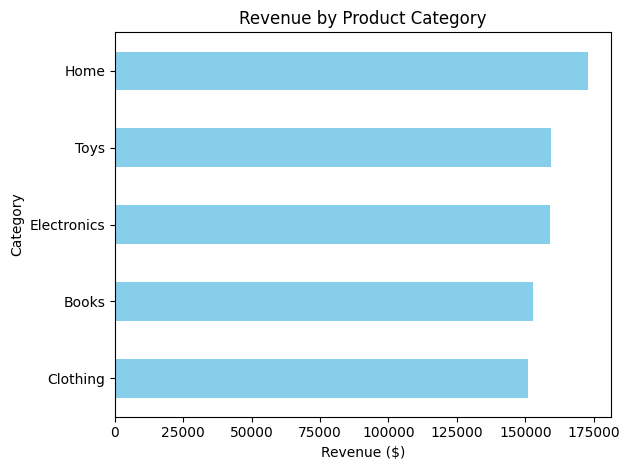

In [15]:
df.groupby('Category')['TotalPrice'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Revenue by Product Category')
plt.xlabel('Revenue ($)')
plt.tight_layout()
plt.show()

In [18]:
# export to excel

In [16]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_customers)

CustomerID
C00252    7403.7
C00001    7403.7
C00173    6759.9
C00147    6759.9
C00063    6759.9
C00054    6438.0
C00005    6438.0
C00069    6438.0
C00289    6116.1
C00111    6116.1
Name: TotalPrice, dtype: float64


In [17]:
orders_per_customer = df.groupby('CustomerID')['OrderID'].nunique().sort_values(ascending=False).head(10)
print(orders_per_customer)

CustomerID
C00099    9
C00001    8
C00039    8
C00233    8
C00063    8
C00053    7
C00104    7
C00111    7
C00113    7
C00144    7
Name: OrderID, dtype: int64


In [20]:
aov_per_customer = (df.groupby('CustomerID')['TotalPrice'].sum() / 
                    df.groupby('CustomerID')['OrderID'].nunique()).sort_values(ascending=False).head(10)

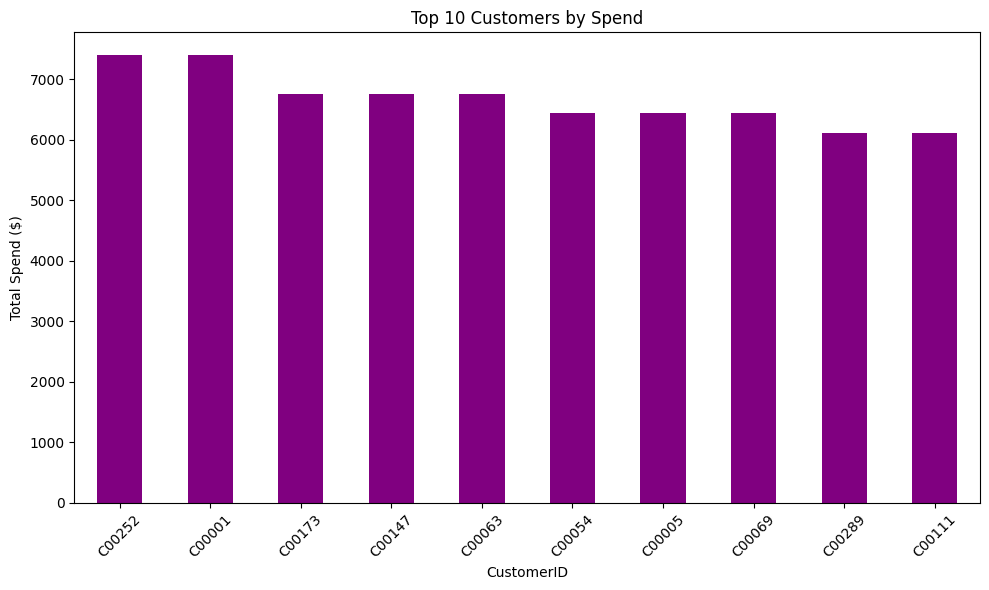

In [21]:
import matplotlib.pyplot as plt

top_customers.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('Top 10 Customers by Spend')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
top_products = df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

In [23]:
top_revenue_products = df.groupby('ProductID')['TotalPrice'].sum().sort_values(ascending=False).head(10)


In [24]:
returns = df[df['ShippingStatus'].isin(['Cancelled', 'Returned'])]
returns_summary = returns['ProductID'].value_counts().head(10)


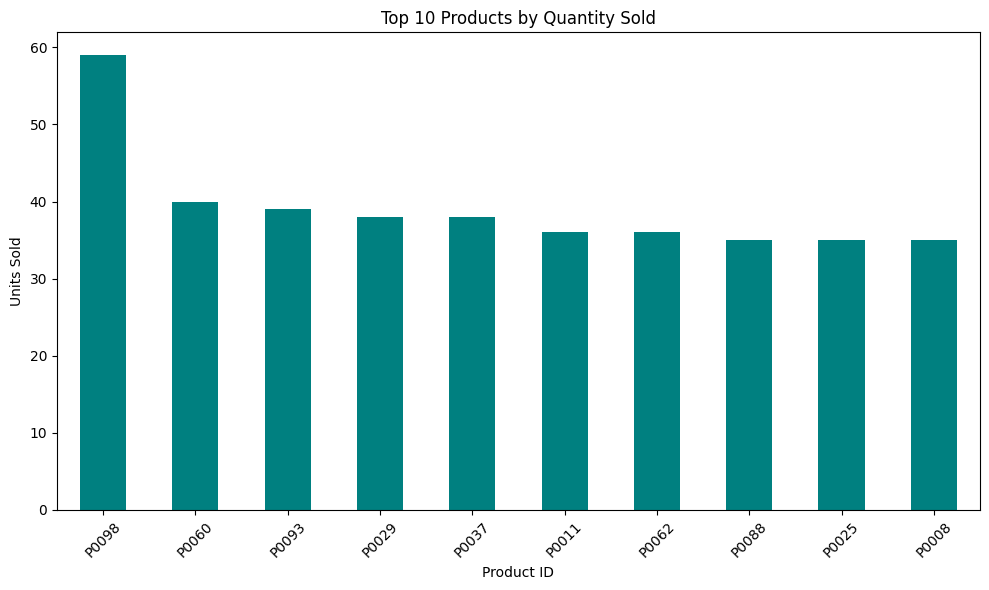

In [25]:
top_products.plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Top 10 Products by Quantity Sold')
plt.ylabel('Units Sold')
plt.xlabel('Product ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
total_revenue = df['TotalPrice'].sum()
print("Total Revenue: $", round(total_revenue, 2))

Total Revenue: $ 795093.0


C:\Users\Senthil Kumar\AppData\Local\Temp\ipykernel_20112\4051003350.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='OrderDate')['TotalPrice'].sum()


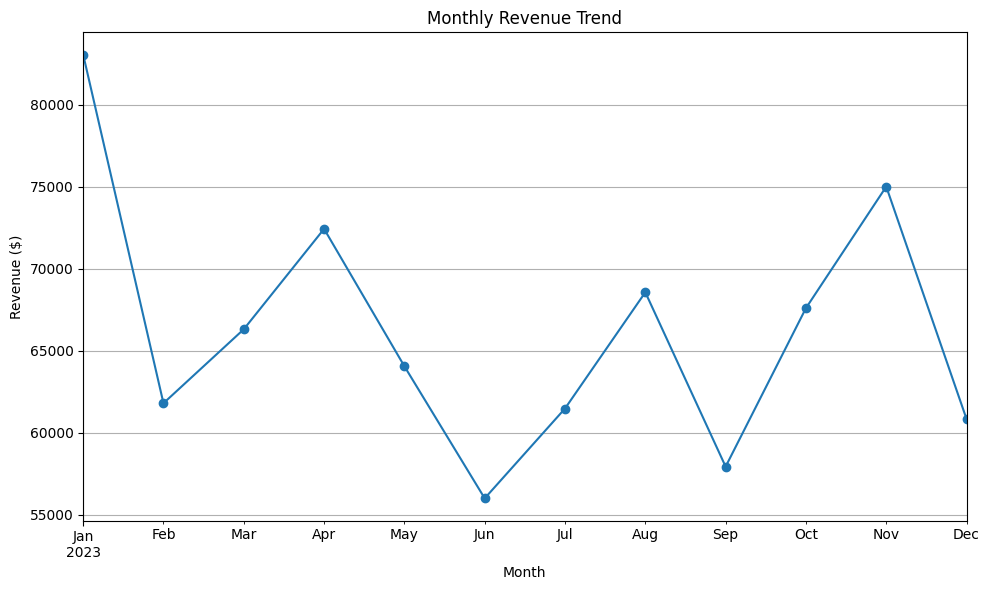

In [27]:
monthly_sales = df.resample('M', on='OrderDate')['TotalPrice'].sum()

monthly_sales.plot(marker='o', figsize=(10,6))
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

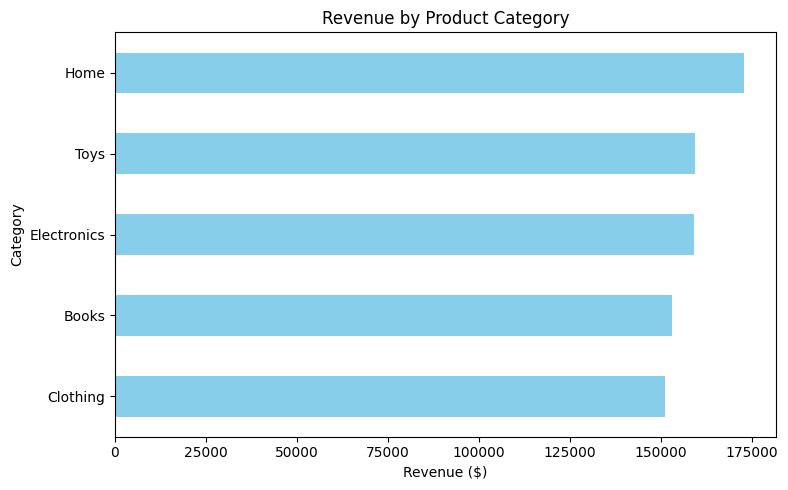

In [28]:
category_revenue = df.groupby('Category')['TotalPrice'].sum().sort_values()

category_revenue.plot(kind='barh', color='skyblue', figsize=(8,5))
plt.title('Revenue by Product Category')
plt.xlabel('Revenue ($)')
plt.tight_layout()
plt.show()


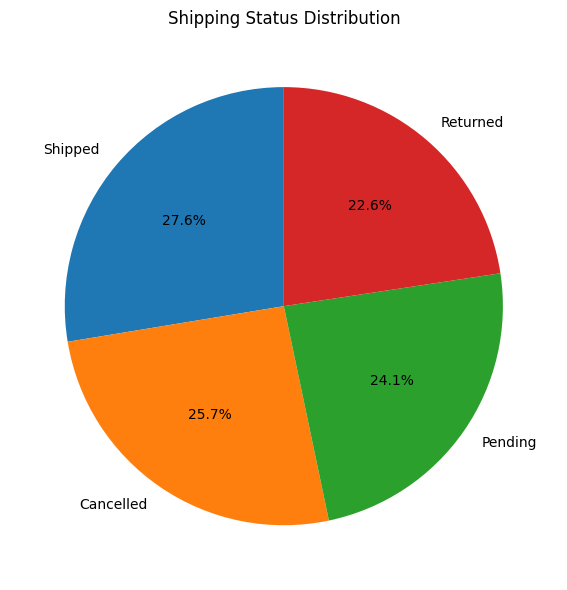

In [29]:
df['ShippingStatus'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title('Shipping Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()
